In [1]:
#initial stetup

import sys
sys.path.append(r'Desktop\SMU_files\\')
import Keithley2401_voltmeter_063023 as K2401
import pyvisa
import time
import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

rm = pyvisa.ResourceManager()
SMU_RM = rm.open_resource('GPIB0::3::INSTR')
SMU = K2401.Keithley2401(SMU_RM)
SMU.initial_setup()
plt.ion()

<IPython.core.display.Javascript object>


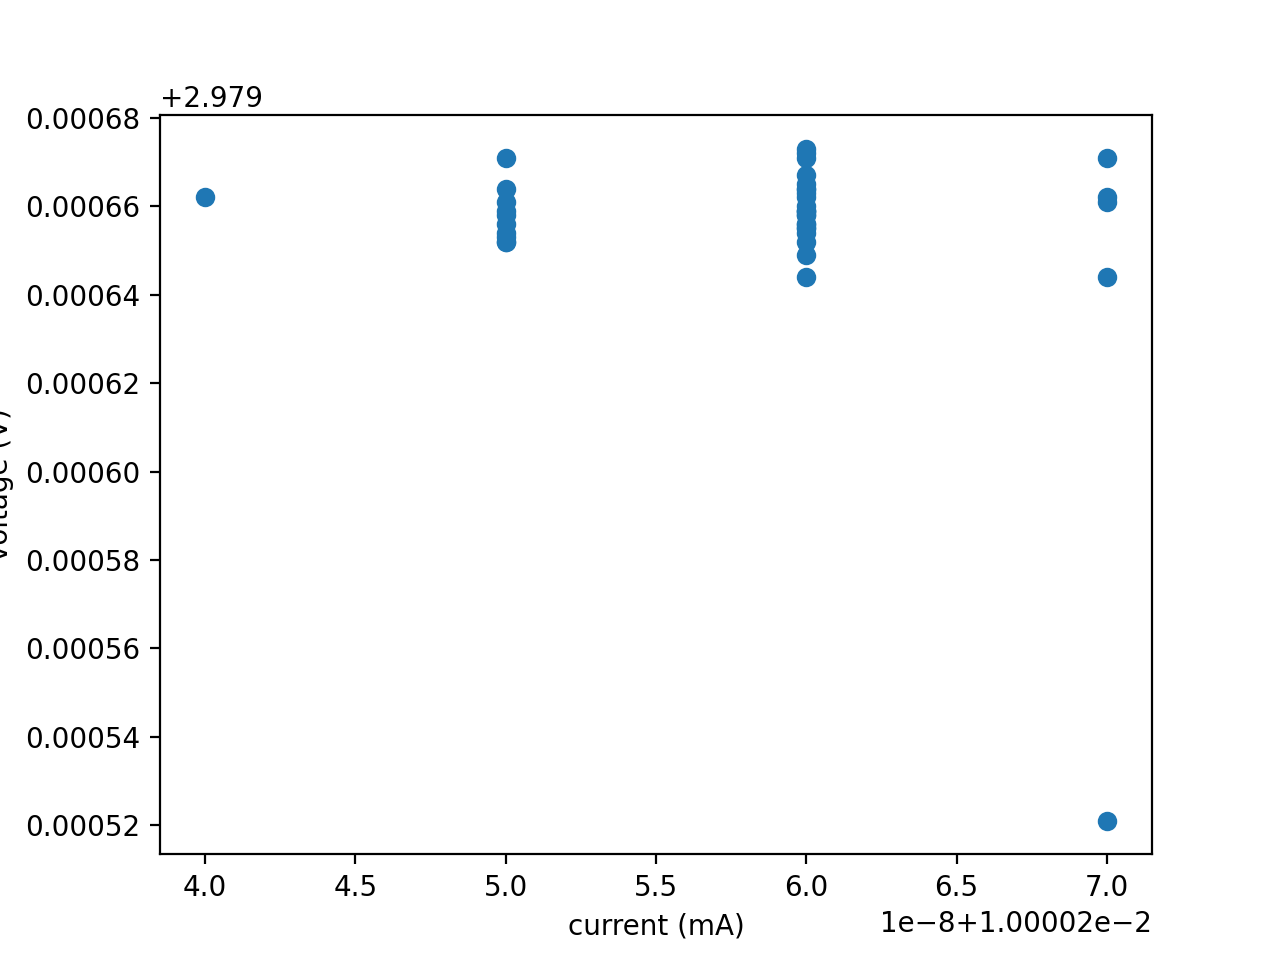

<IPython.core.display.Javascript object>


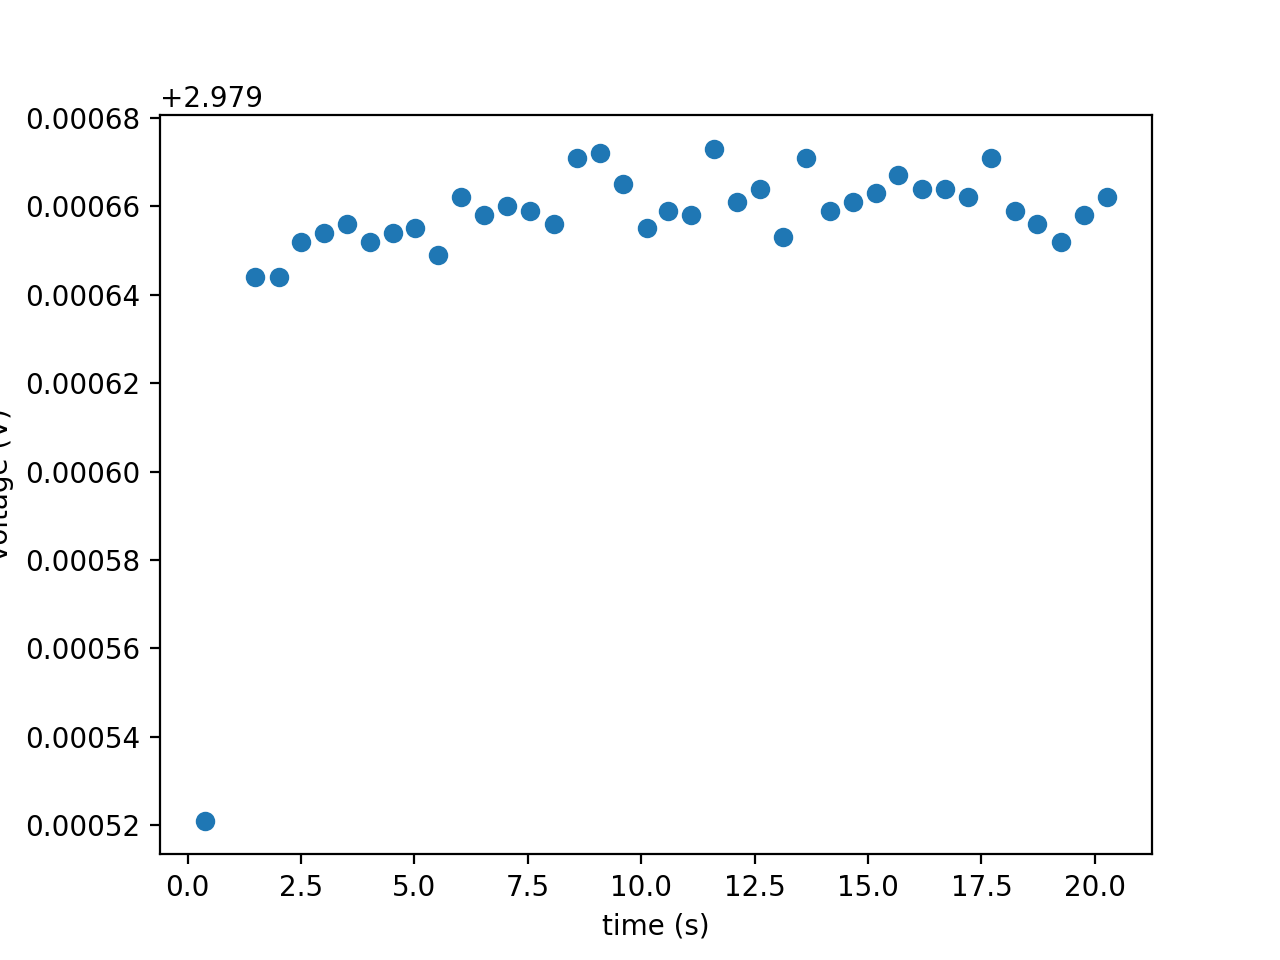

In [2]:
#constant current, read voltage

time0 = time.time()
current_level = 10e-3 # set a constant current
measurement_time = 20 # number of seconds to perform measurement
num_readings = 40 # number of data points to collect
wait_time = measurement_time/num_readings # wait time between measurements in seconds

NPLC = 1
I_range = 10e-3 # current range
V_compliance = 5 # max voltage
init_wait = 0.25 # does not do anything yet
SMU.setup_single_Vmeas(NPLC = NPLC, I_range = I_range, V_compliance = V_compliance, current_level = current_level, init_wait = init_wait)
SMU.turn_on()

#initializes dynamically updating plots
cv = K2401.DynamicUpdateOG()
tv = K2401.DynamicUpdateOG()

cv.on_launch("current (mA)", "voltage (V)")
tv.on_launch("time (s)", "voltage (V)")

#creates lists to store data
currents = []
times = []
voltages = []

#generates data and accounts for time lag
for i in range(1,num_readings):
    time_1 = time.time()
    
    I,V = SMU.single_Vmeas()
    currents.append(I)
    voltages.append(V)
    times.append(time.time()-time0)
    cv.on_running(currents, voltages)
    tv.on_running(times, voltages)
    
    time_2 = time.time()
    time_error = time_2 - time_1
    
    if time_error < wait_time:
        time.sleep(wait_time - time_error)
    else:
        time.sleep(time_error)

SMU.turn_off()

#stores data and prints a figure displaying voltage vs. time
tv.on_completion("CC", F'{current_level}amp', currents, voltages, times, voltages)

<IPython.core.display.Javascript object>


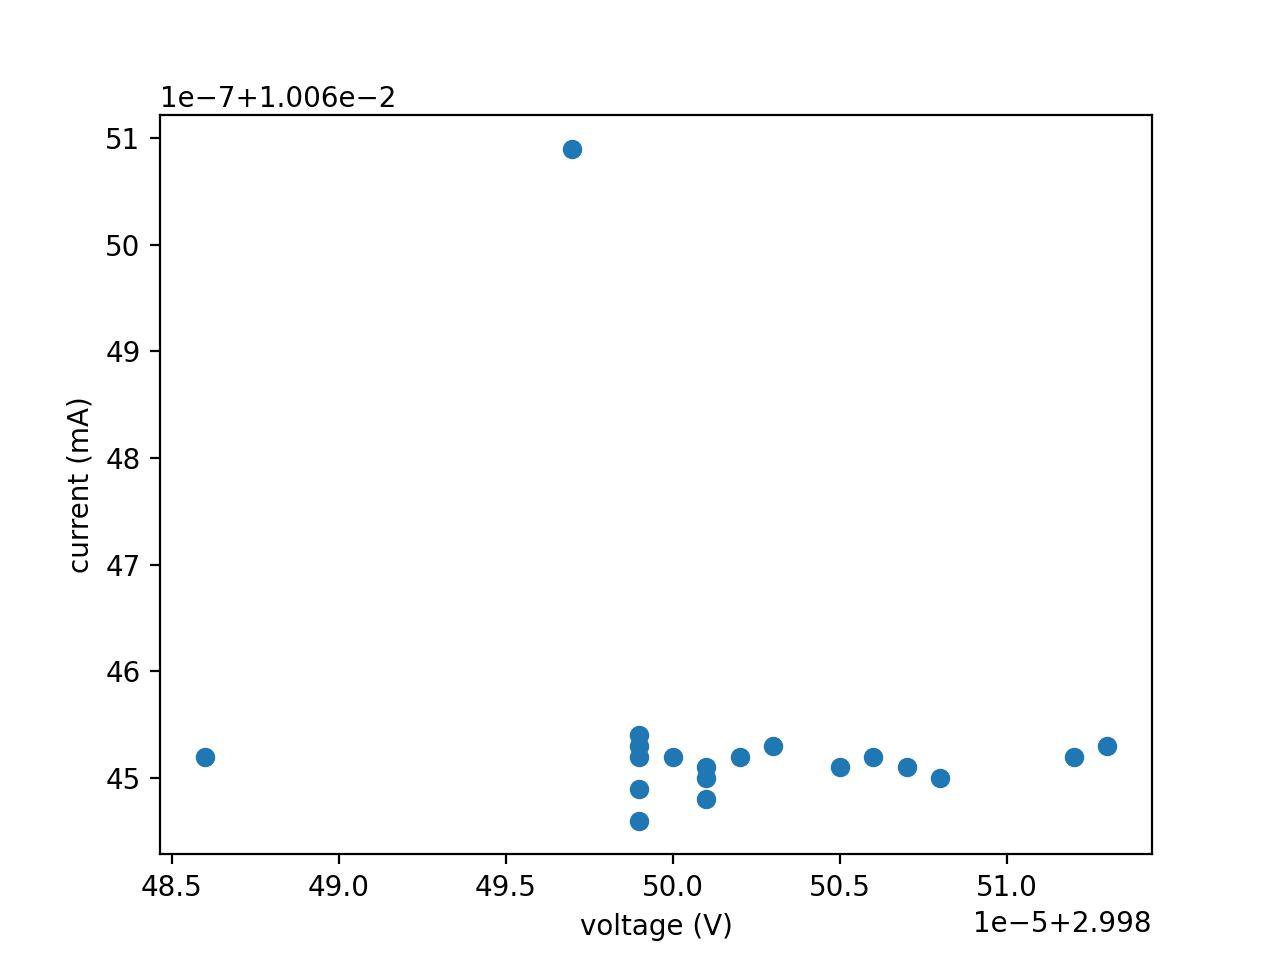

<IPython.core.display.Javascript object>


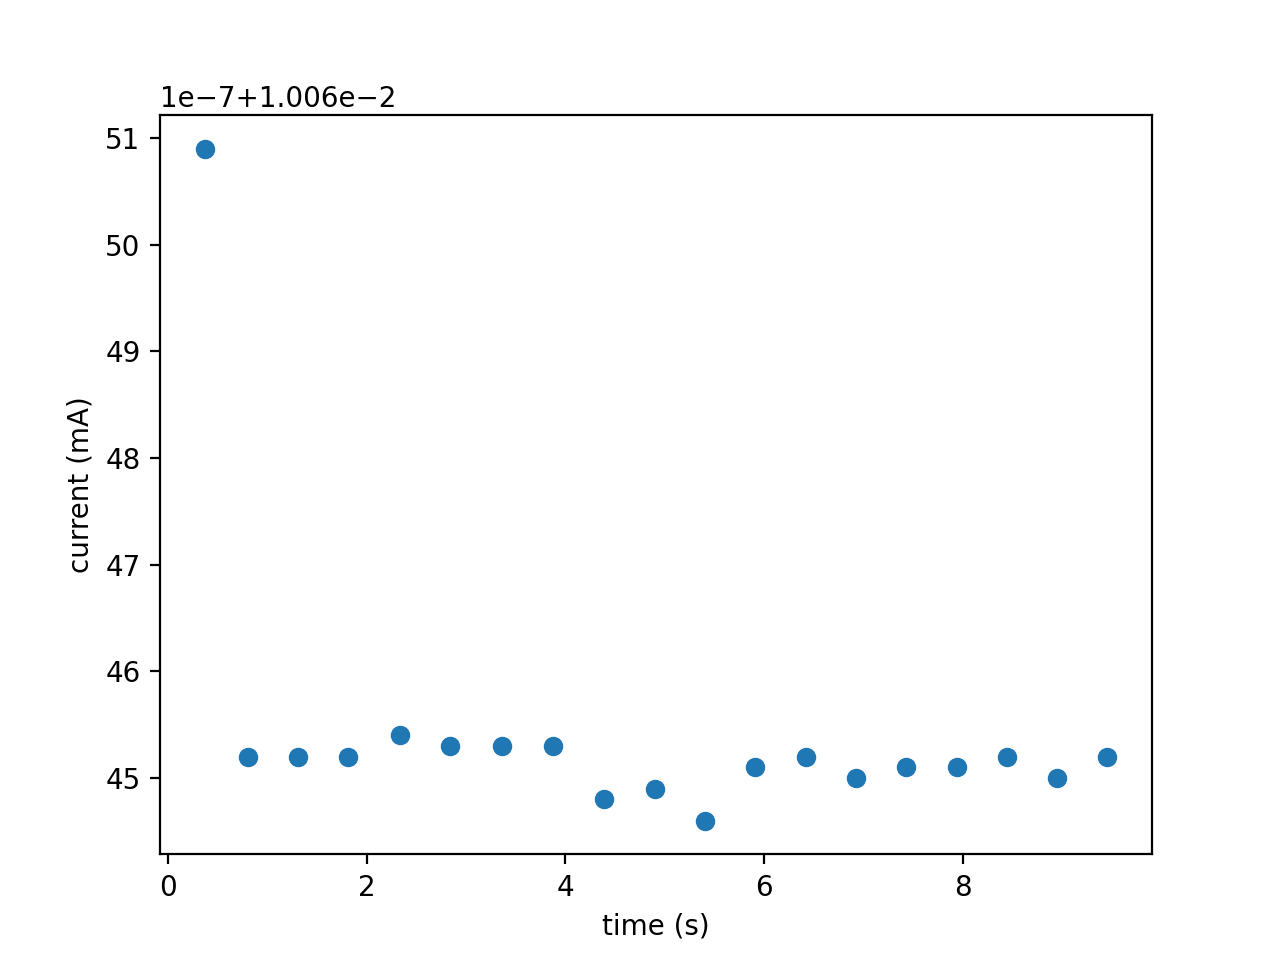

In [2]:
#constant voltage, read current

time0 = time.time()
voltage_level = 3 # set a constant voltage
measurement_time = 10 # number of seconds to perform measurement
num_readings = 20 # number of data points to collect
wait_time = measurement_time/num_readings # wait time between measurements in seconds

NPLC = 1
V_range = 20 # voltage range
I_compliance = 1e-1 # max current
V_compliance = 5 # max voltage
init_wait = 0.25 # does not do anything yet
SMU.setup_single_Imeas(NPLC = NPLC, V_range = V_range, V_compliance = V_compliance, I_compliance = I_compliance, voltage_level = voltage_level, init_wait = init_wait)
SMU.turn_on()

#initializes dynamically updating plots
vc = K2401.DynamicUpdateOG()
tc = K2401.DynamicUpdateOG()

vc.on_launch("voltage (V)", "current (mA)")
tc.on_launch("time (s)", "current (mA)")

#creates lists to store data
currents = []
times = []
voltages = []

#generates data and accounts for time lag
for i in range(1,num_readings):
    time_1 = time.time()
    
    I,V = SMU.single_Vmeas()
    currents.append(I)
    voltages.append(V)
    times.append(time.time()-time0)
    vc.on_running(voltages, currents)
    tc.on_running(times, currents)
    
    time_2 = time.time()
    time_error = time_2 - time_1
    
    if time_error < wait_time:
        time.sleep(wait_time - time_error)
    else:
        time.sleep(time_error)

SMU.turn_off()

#stores data and prints a figure displaying current vs. time
tc.on_completion("CP", F'{voltage_level}volt', voltages, currents, times, currents)